### Import and load data

In [4]:
import pandas as pd
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
%matplotlib inline

path = 'data'

fn = os.path.join('..', path, "baseball_stats.xls")
df = pd.read_excel(fn, usecols="A:M")
df
df.head(3)

,name,team,pos,games,at_bat,pitches,bunts,gnd_dp,intl_walk,bb,k,bb_pct,bb_per_K
0,"Inciarte, Ender",ATL,OF,148,634,3.54,42,8,3,45,92,6.6,0.49
1,"Lindor, Francisco",CLE,SS,151,620,3.78,14,11,6,56,90,8.3,0.62
2,"Blackmon, Charlie",COL,OF,151,615,3.96,9,4,8,60,131,8.9,0.46


In [2]:
df

,name,team,pos,games,at_bat,pitches,bunts,gnd_dp,intl_walk,bb,k,bb_pct,bb_per_K
0,"Inciarte, Ender",ATL,OF,148,634,3.54,42,8,3,45,92,6.6,0.49
1,"Lindor, Francisco",CLE,SS,151,620,3.78,14,11,6,56,90,8.3,0.62
2,"Blackmon, Charlie",COL,OF,151,615,3.96,9,4,8,60,131,8.9,0.46
3,"Gordon, Dee",MIA,2B,149,613,3.46,72,7,0,25,87,3.9,0.29
4,"Betts, Mookie",BOS,OF,148,612,3.94,1,9,8,74,77,10.8,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,"Nunez, Renato",OAK,3B,4,5,5.17,0,0,0,1,3,16.7,0.33
630,"Andujar, Miguel",NYY,3B,3,5,4.67,0,0,0,1,0,16.7,0.00
631,"Freeman, Mike",LAD,2B,4,5,3.80,0,0,0,0,2,0.0,0.00
632,"Dickson, O'Koyea",LAD,1B,5,5,3.71,0,0,1,2,2,28.6,1.00


### Have a look at the raw data and a couple stats

mean 8.29
std 4.29
original NormaltestResult(statistic=27.322761595776385, pvalue=1.1666422605455809e-06)


<AxesSubplot:>

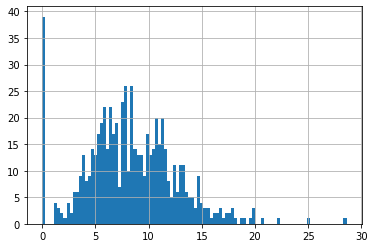

In [6]:
ser = df['bb_pct']

print("mean", round(ser.mean(), 2))
print("std",  round(ser.std(), 2))
print('original', stats.normaltest(ser))

ser.hist(bins=100)

###  prune outliers

mean 8.68
std 3.56


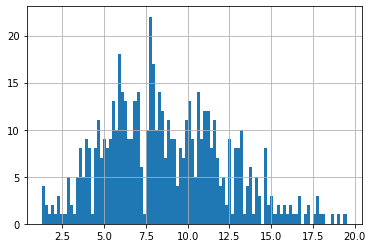

In [8]:
fixed_ser = ser[(ser > 0) & (ser < 20)]
fixed_ser.hist(bins=100)

print("mean", round(fixed_ser.mean(), 2))
print("std",  round(fixed_ser.std(), 2))

In [9]:
print('fixed', stats.normaltest(fixed_ser))

fixed NormaltestResult(statistic=16.739730736631476, pvalue=0.0002317467520934554)


<AxesSubplot:>

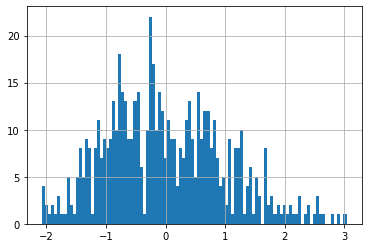

In [11]:
# standardize the data
mean = fixed_ser.mean()
stdev = fixed_ser.std()
norm = (fixed_ser-mean)/stdev
norm.hist(bins=100)

<AxesSubplot:>

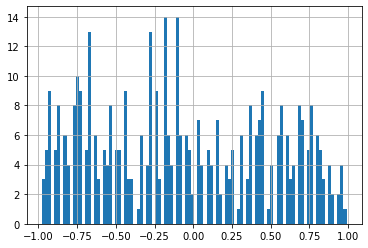

In [12]:
# make a 3-sigma mask
bmask = norm[(abs(norm) < 1)]
new_norm = norm[bmask.index]
new_norm.hist(bins=100)

mean 8.43
std 1.99
original NormaltestResult(statistic=237.73331806614715, pvalue=2.381583976404695e-52)


<AxesSubplot:>

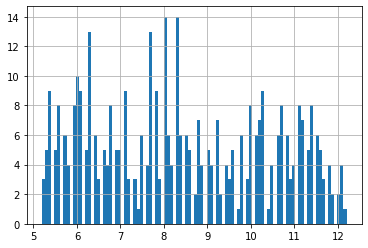

In [13]:
pruned_ser = ser[new_norm.index]

print("mean", round(pruned_ser.mean(), 2))
print("std",  round(pruned_ser.std(), 2))
print('original', stats.normaltest(pruned_ser))
pruned_ser.hist(bins=100)

<AxesSubplot:>

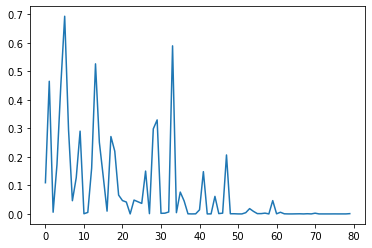

In [16]:
# how does n affect normalicy stats?  
results = []

# Run the normalicy test with samples of different sizes
for n in [x for x in range(20, 100, 1)]:
    _, p = stats.normaltest(pruned_ser.sample(n))
    results.append(p)
    
# Have a look    
s = pd.Series(ls)
s.plot.line()